# Description of the Project

    I used Amazon Gen 3 Ecodot product reviews dataset which I downloaded on the Kaggle. The dataset has 4084 rows and 4 columns. I used reviews and divison column in this analysis. I used Bernoulli Naive Bayes, Logistic Regression and Support Vector Machine(2 different model). I visualize data with WordCloud. I used NLTK libraries for StopWords and SnowBallStemmer for determining the root of the words. For evaluating the models, I calculate Accuracy score, Confusion Matrix adn Classification Report. The more detail is below...

# Import the libraries

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')

stemmer = nltk.SnowballStemmer("english")

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to C:\Users\Lenovo
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Import the Dataset

In [201]:
data = pd.read_csv('Eco.csv')
data.head()

,Unnamed: 0,review,polarity,division
0,3870,able play youtube alexa,0.5000,positive
1,62,able recognize indian accent really well drop ...,0.2794,positive
2,487,absolute smart device amazon connect external ...,0.1827,positive
3,3204,absolutely amaze new member family control hom...,0.3682,positive
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive


In [196]:
data.shape

(4084, 4)

### Dataset has 4084 entries and 4 columns but in this analysis I used review and divison columns.

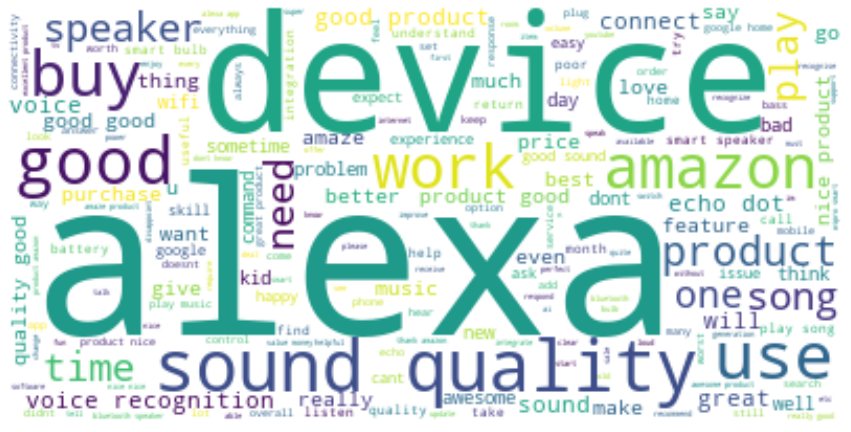

In [202]:
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Interpretation of the WordCloud

    Alexa, device, sound, quality words are most used in the reviews. So, sound quality could be worse or better. I cannot say about that. Because this wordcloud has all review. Below I visualize the data which has negative review.

In [203]:
data_neg = data[data['division'] == 'negative']

In [204]:
data_neg.head()

,Unnamed: 0,review,polarity,division
9,2578,accessibility limit amazon apps music appsexce...,-0.0905,negative
22,2609,ai not good play track alexa dont understand u...,-0.0625,negative
23,1847,ai system need improvement poor performance co...,-0.0333,negative
32,3695,alexa act stupid,-0.8000,negative
40,3312,alexa app not available download connect,-0.2000,negative


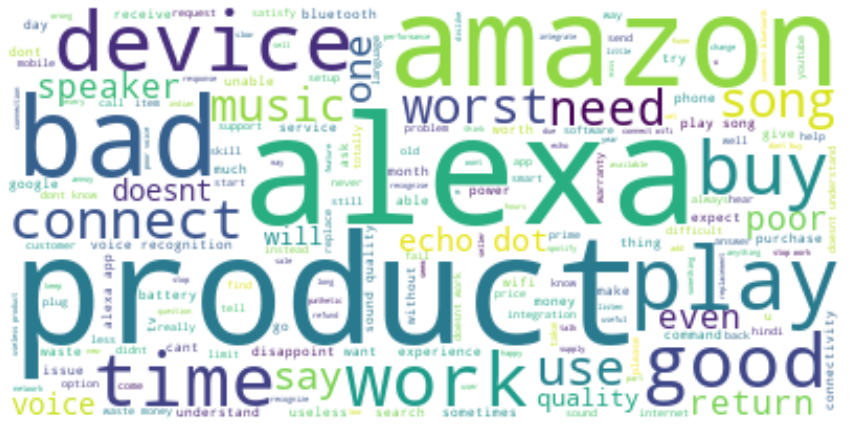

In [205]:
text = " ".join(i for i in data_neg.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Interpretation of the Wordcloud

    Negative reviewer used alexa, product, amazon, bad, device, time, connect words. So, I can say that maybe amazon should ship fastly also, product can have connection problem. 

In [192]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    #Remove without letters
    text = re.sub("[^a-zA-Z]", " ", text)
    text = [word for word in text.split(' ') if word not in all_stopwords]
    #transform the list to string again
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [193]:
data["review"] = data["review"].apply(clean)

In [194]:
data['review'].head()

0                                abl play youtub alexa
1    abl recogn indian accent realli well drop func...
2    absolut smart devic amazon connect extern sub ...
3    absolut amaz new member famili control home vo...
4    absolut amaz previous sceptic invest money arr...
Name: review, dtype: object

In [177]:
data['division'] = data['division'].map({"positive":2, "neutral":0, "negative":1})

In [178]:
data['division'].head()

0    2
1    2
2    2
3    2
4    2
Name: division, dtype: int64

In [169]:
cv = CountVectorizer()
X = cv.fit_transform(data.review)

In [170]:
tidf = TfidfVectorizer()
X2= tidf.fit_transform(data['review'])

In [172]:
print(X2)

  (0, 122)	0.30387684336466664
  (0, 4624)	0.6076490320566384
  (0, 3008)	0.4202887848541946
  (0, 9)	0.6014805526641246
  (1, 3418)	0.13769395880011637
  (1, 1186)	0.11043379523009995
  (1, 3284)	0.20498055123465006
  (1, 2857)	0.222900287151043
  (1, 4244)	0.222900287151043
  (1, 2698)	0.0966666048411481
  (1, 1585)	0.19921168479020104
  (1, 2544)	0.1944981777007341
  (1, 781)	0.31122738943301864
  (1, 2279)	0.1621108547902689
  (1, 2254)	0.222900287151043
  (1, 3791)	0.07337270807295329
  (1, 4579)	0.12566305573435066
  (1, 866)	0.16469828383454715
  (1, 3570)	0.20498055123465006
  (1, 4545)	0.08573123098371495
  (1, 3552)	0.17080957533989216
  (1, 3024)	0.13454277618881763
  (1, 3709)	0.09423821235426622
  (1, 2689)	0.1788279220406358
  (1, 2978)	0.16469828383454715
  :	:
  (4081, 2675)	0.7029898769966688
  (4081, 3970)	0.2573571848142503
  (4081, 3319)	0.2304757480406788
  (4081, 4624)	0.24883898734777926
  (4082, 605)	0.37035373573462466
  (4082, 196)	0.37035373573462466
  (4082,

# Split the data

In [181]:
y = data['division']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=0)

# Build the Model Function

In [182]:
def models(X_train,y_train):
    
    #Use Logistic Regression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,y_train)
    
    #Use Bernoulli Naive Bayes
    ber = BernoulliNB()
    ber.fit(X_train,y_train)
    
    #Use SVC (Linear Kernel)
    svc_lin = SVC(kernel = 'linear', random_state=0)
    svc_lin.fit(X_train, y_train)
    
    #Use SVC (RBF Kernel)
    svc_rbf = SVC(kernel = 'rbf', random_state=0)
    svc_rbf.fit(X_train, y_train)
    
    #Print the training accuracy for each model
    
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train,y_train))
    print('[1]SVC Linear Training Accuracy: ', svc_lin.score(X_train,y_train))
    print('[2]SVC RBF Training Accuracy: ', svc_rbf.score(X_train,y_train))
    print('[3]Bernoulli NB Training Accuracy: ', ber.score(X_train,y_train))
    
    return log, svc_lin, svc_rbf, ber

In [185]:
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy:  0.976557032890133
[2]SVC Linear Training Accuracy:  0.9793561931420574
[3]SVC RBF Training Accuracy:  0.940517844646606
[4]Bernoulli NB Training Accuracy:  0.7736179146256124


# Interpretation of the Models Results

    Logistic Regression and Support Vector Machine which is Linear Kernel have highest accuracy scores. The lowest accuracy score is Bernoulli Naive Bayes. The next I calculate classification report and Confusion Matrix for the models.

In [208]:
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(X_test))
    clas_rep = classification_report(y_test, model[i].predict(X_test))
    
    print(cm)
    print(clas_rep)
    print()

[[122   4  29]
 [ 20  74  53]
 [ 22  18 884]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       155
           1       0.77      0.50      0.61       147
           2       0.92      0.96      0.94       924

    accuracy                           0.88      1226
   macro avg       0.81      0.75      0.77      1226
weighted avg       0.88      0.88      0.87      1226


[[133   1  21]
 [ 28  75  44]
 [ 36  28 860]]
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       155
           1       0.72      0.51      0.60       147
           2       0.93      0.93      0.93       924

    accuracy                           0.87      1226
   macro avg       0.78      0.77      0.76      1226
weighted avg       0.87      0.87      0.87      1226


[[ 92   0  63]
 [ 18  26 103]
 [ 12   2 910]]
              precision    recall  f1-score   support

           0       0.75      0.59      0.66

# Interpretation of the Classification Report and Confusion Matrix for Models

    Logistic Regression and Support Vector Machine which has Linear Kernel have the best classification scores. Espicially negative reviews accuracy is more similar and better than the other models. In my opinion, negative review classification accuracy is more important the positive reviews, because the main aim is this analysis is to determine the problems about the product or lead process.